## 实验题目 4：牛顿迭代法

## 问题分析

> 准确描述并总结出实验题目（摘要），并准确分析原题的目的和意义。

### 方法概要

求非线性方程 $f(x)=0$ 的根 $x^*$，牛顿分析法计算公式：

$$
x_0 = \alpha \\
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \\
n = 0,1,\cdots\\
$$

一般地，牛顿迭代法具有局部收敛性，为了保证迭代收敛，要求，对充分小的 $\delta, \alpha \in O(x^*,\delta)$。如果 $f(x) \in C^2[a,b],f(x^*) = 0, f'(x^*) \ne 0$，那么，对充分小的 $\delta > 0$，当 $\alpha \in O(x^*, \delta)$ 时，由牛顿迭代法计算出的 $\{x_n\}$ 收敛于 $x^*$，且收敛速度是 2 阶的；如果 $f(x) \in C^m[a,b],f(x^*) = f'(x^*)=\cdots =f^{(m-1)}(x^*)=0$，$f^{(m)}(x^*)\ne 0 (m > 1)$，那么，对充分小的 $\delta > 0$，当$\alpha \in O(x^*,\delta)$时，由牛顿迭代法计算出的$\{x_n\}$收敛于$x^*$，且收敛速度是 1 阶的。

### 实验目的

利用牛顿迭代法求 $f(x) = 0$ 的根。

**输入：** 初值 $\alpha$，精度 $\varepsilon_1,\varepsilon_2$，最大迭代次数 $N$

**输出：** 方程 $f(x) = 0$ 根 $x^*$ 的近似值或计算失败标志

## 数学原理

> 数学原理表达清晰且书写准确。

### 牛顿迭代法的几何意义



![几何意义](imgs/newton01.png)

由上图所示，方程 $f(x)=0$ 的根 $\alpha$ 是曲线 $y=f(x)$ 与直线 $y=0$ 的交点的横坐标。牛顿迭代法是取过 $(x_i,f(x_i))$ 点的切线方程

$$
y = f(x_i) = f'(x_i)(x-x_i)
$$

与 $y = 0$ 的交点的横坐标

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

作为根的新的近似值。由此往复，只要初值取得接近根 $\alpha$，$\{x_0,x_1,\cdots,x_n\}$ 会很快收敛于 $\alpha$。

## 程序设计流程

> 编译通过，根据输入能得到正确输出。

In [9]:
# 引入需要的包
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
from typing import *

In [41]:
def newton(
        f: Callable[[float], float],
        f_: Callable[[float], float],
        alpha: float,
        N: int,
        epsilon_1: float,
        epsilon_2: float,
        *args,
        **kwargs):# -> Optional[float]:
    history: List[float] = []
    n = 1
    x = alpha
    while n <= N:
        history.append(x)
        v, v_ = f(x), f_(x)
        if abs(v) < epsilon_1:
            return x, history
        if abs(v_) < epsilon_2:
            return None, history
        x_ = x - v / v_
        if abs(x_ - x) < epsilon_1:
            history.append(x_)
            return x_, history
        n = n + 1
        x = x_
    return None, history

In [42]:
def show_history(title: str, history: List[float]):
    plt.figure(dpi=100)
    plt.title(title)
    plt.plot(range(len(history)), history)

In [43]:
def run_question(*args, **kwargs):
    res, history = newton(*args, **kwargs)
    if res is None:
        print("拟合失败!")
    else:
        print(f"x^* = {res:.4f}")
    show_history(kwargs.get('title', ''), history)


问题 1 (1)
x^* = 0.7391
问题 1 (2)
拟合失败!


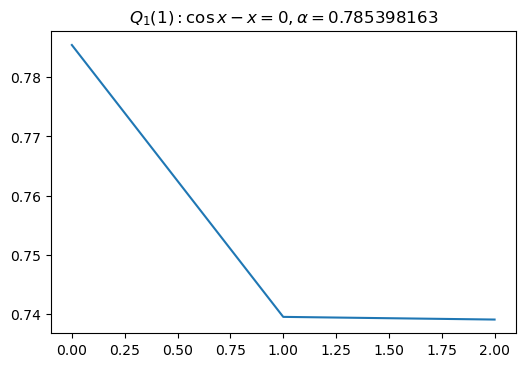

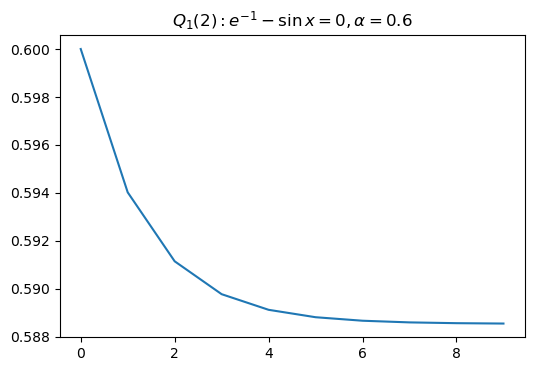

In [44]:

# 问题一
def question_1():
    print("问题 1 (1)")
    run_question(
        f=lambda x: np.cos(x) - x,
        f_=lambda x: -np.sin(x) - 1,
        alpha=np.pi / 4,
        N=10,
        epsilon_1=1e-6,
        epsilon_2=1e-4,
        title="$Q_1 (1): \\cos{x} - x = 0, \\alpha = " + f"{np.pi / 4:.9f}" + "$")
    print("问题 1 (2)")
    run_question(
        f=lambda x: np.exp(-x) - np.sin(x),
        f_=lambda x: -np.exp(x) - np.cos(x),
        alpha=0.6,
        N=10,
        epsilon_1=1e-6,
        epsilon_2=1e-4,
        title="$Q_1 (2): e^{-1}-\\sin{x} = 0, \\alpha = 0.6$")


question_1()


问题 2 (1)
x^* = 0.5671
问题 2 (2)
x^* = 0.5666


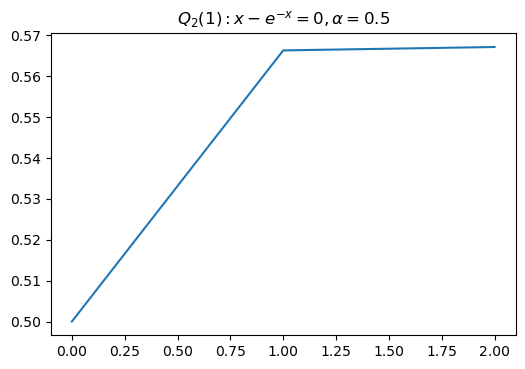

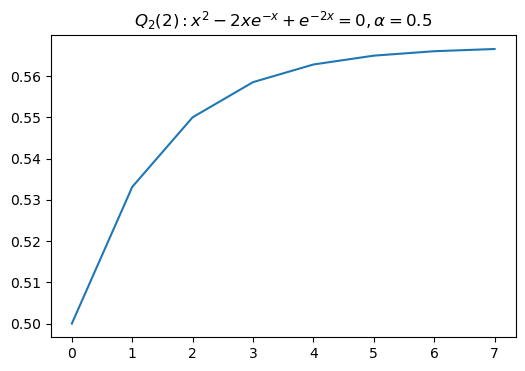

In [45]:

# 问题二
def question_2():
    print("问题 2 (1)")
    run_question(
        f=lambda x: x - np.exp(-x),
        f_=lambda x: 1 + np.exp(-x),
        alpha=0.5,
        N=10,
        epsilon_1=1e-6,
        epsilon_2=1e-4,
        title="$Q_2 (1): x-e^{-x}=0, \\alpha = 0.5$")
    print("问题 2 (2)")
    run_question(
        f=lambda x: x**2 - 2 * x * np.exp(-x) + np.exp(-2 * x),
        f_=lambda x: -2*np.exp(-2*x) - 2*np.exp(-x) + 2*x + 2*np.exp(-x)*x,
        alpha=0.5,
        N=10,
        epsilon_1=1e-6,
        epsilon_2=1e-4,
        title="$Q_2 (2): x^2-2xe^{-x}+e^{-2x} = 0, \\alpha = 0.5$")


question_2()


## 实验结果

> 准确规范地给出各个实验题目的结果，并对相应的思考题给出正确合理的回答与说明。

由问题 1 输出、图像可知：

1. 第一问在第二次迭代即收敛到目标精度，得结果 $x^* = 0.7391$（保留四位小数）
2. 第二问在 $N$ 次数内收敛失败

由问题 2 输出、图像可知：

1. 第一问在第二次迭代即收敛到目标精度，得结果 $x^* = 0.5671$（保留四位小数）
2. 第一问在第七次迭代才收敛到目标精度，得结果 $x^* = 0.5666$（保留四位小数）

**思考题：**

1. *对实验 1，确定初值的原则是什么？实际计算中应如何解决？*
    初值如果选择得偏离根太远，很可能出现迭代次数过多或者发散的情况。因此，初值最好选择在靠近根的位置。在实际计算中，如果仅仅使用牛顿迭代法收敛定理来选择初始值，往往比较复杂，一般使用简化方法：

    对方程 $f(x) = 0$，如果
    $$
    f''(x_0)\ne 0, |f'(x_0)|^2>|\frac{f(x_0)f''(x_0)}{2}|
    $$
    则可以保证大多数情况下的牛顿迭代法的收敛性。
2. *对实验 2，如何解释在计算中出现的现象？试加以说明*
    由于牛顿迭代法的收敛阶都是 $2$，而第二问所求函数是第一问的平方，即 $f_2(x) = f_1^2(x)$，平方后的函数的斜率相对原来小许多，所以第二问中收敛就比第一问慢。

